In [119]:
!pip install pandas matplotlib seaborn wordcloud nltk scikit-learn textblob numpy beautifulsoup4

In [125]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import numpy as np
import nltk
from bs4 import BeautifulSoup
import string

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyross/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
import re

# Function to clean location data
def clean_location(location):
    # Remove "United States of America", "USA", etc.
    location = re.sub(r',?\s*(United States of America|USA|U\.S\.A\.)', '', location, flags=re.IGNORECASE)
    
    # Standardize extra spaces and commas
    location = location.strip().replace(' ,', ',').replace(', ', ', ')
    
    # Return cleaned location
    return location

def clean_organization(x):
    if isinstance(x, list):
        return ', '.join(x)  # Join list elements into a single string
    elif isinstance(x, str) and len(x.strip()) > 0:
        return x  # Keep strings as they are
    else:
        return 'Unknown'  # Handle unexpected types (e.g., None, NaN)

# Function to remove HTML from descriptions
def clean_html(description):
    soup = BeautifulSoup(description, "html.parser")
    return soup.get_text()

def clean_all_description(description):
    text = clean_html(description)
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# 3. Keyword Extraction omitting stop words
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.lower().split() if word not in stop_words]
    return ' '.join(words)


In [146]:
# Load the data

with open('./netflix_culture.txt', 'r') as f:
    cleaned_culture_doc = clean_text(f.read())

with open('./netflix_jobs.json', 'r') as f:
    job_data = json.load(f)




# Convert to DataFrame
df = pd.DataFrame(job_data).transpose()

# Preview the data

# Apply the function to the 'location' column
df['cleaned_location'] = df['location'].apply(clean_location)

# Apply the function to the 'organization' column
df['cleaned_organization'] = df['team'].apply(clean_organization)

df['cleaned_description'] = df['description'].apply(clean_all_description)

# Show cleaned locations
df[['location', 'cleaned_location']].drop_duplicates().head()

# Extract year-month from 'created_at' to group the data
df['created_at'] = pd.to_datetime(df['created_at'], utc=True) # Convert to datetime
df['year_month'] = df['created_at'].dt.to_period('M')
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month

df.head()



/var/folders/4c/1md21q016sl7qgf2vhtk3dk80000gn/T/ipykernel_92239/3523266918.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['created_at'].dt.to_period('M')


,text,lever_id,team,slug,external_id,description,search_text,state,updated_at,created_at,...,id,alternate_locations,department,apply_url,cleaned_location,cleaned_organization,cleaned_description,year_month,year,month
604847d5b5811b50a0e91968,"Engineering Manager, Notebooks",2398a8f9-ea0b-47db-bd70-80fffb0823bc,[Core Engineering],engineering-manager-notebooks,65824437,<div>Netflix is the world's leading internet T...,"Los Gatos, California \r\n Product \r\n Core E...",Public,2021-05-27T15:35:44+00:00,2021-03-10 04:11:52+00:00,...,604847d5b5811b50a0e91968,NaN,NaN,NaN,"Los Gatos, California",Core Engineering,netflix is the worlds leading internet tv netw...,2021-03,2021,3
609d4d14b5811b9f2707b11b,"Engineering Manager, Rendering",a17ac184-bc3d-45ff-9b15-e3f1f47d27af,[Core Engineering],engineering-manager-rendering,83061403,<div>Netflix is the largest production studio ...,"Los Gatos, California \r\n Product \r\n Core E...",Public,2021-05-27T15:35:24+00:00,2021-05-13 15:51:49+00:00,...,609d4d14b5811b9f2707b11b,NaN,NaN,NaN,"Los Gatos, California",Core Engineering,netflix is the largest production studio in th...,2021-05,2021,5
6089bff2aabfb4dc476ba762,Engineering Manager - Partner Engineering,14f5209d-dd4d-44e2-9b74-f697cbae384a,[Partnership],engineering-manager-partner-engineering,79025233,<div><b>The Company and Product Strategy</b></...,"Los Gatos, California \r\n Product \r\n Partne...",Public,2021-05-27T15:35:30+00:00,2021-04-28 19:52:56+00:00,...,6089bff2aabfb4dc476ba762,NaN,NaN,NaN,"Los Gatos, California",Partnership,the company and product strategyinstant stream...,2021-04,2021,4
60878fd1b5811bb54a7dcef1,Site Reliability Engineering Manager,06d455c3-c67a-48c8-b4b8-bbe77f8e4c34,[Video Encoding and Streaming],sre-manager,76427311,"<div><span style=""font-size: 11pt"">SRE Manager...","Los Gatos, California \r\n Product \r\n Video ...",Public,2021-05-27T15:35:30+00:00,2021-04-19 08:00:00+00:00,...,60878fd1b5811bb54a7dcef1,NaN,NaN,NaN,"Los Gatos, California",Video Encoding and Streaming,sre manager committed to leading our cdn relia...,2021-04,2021,4
60772ed4b5811b0d637ddb8c,"Engineering Manager, Security Protocols",90f770fe-9620-437c-9599-867fb2c27676,[Client and UI Engineering],engineering-manager-security-protocols,73872363,<div><b>The Team:&nbsp;</b></div><div>If you’r...,"Los Gatos, California \r\n Product \r\n Client...",Public,2021-05-27T15:35:41+00:00,2021-04-09 19:31:04+00:00,...,60772ed4b5811b0d637ddb8c,NaN,NaN,NaN,"Los Gatos, California",Client and UI Engineering,the team if you’re a netflix customer you have...,2021-04,2021,4


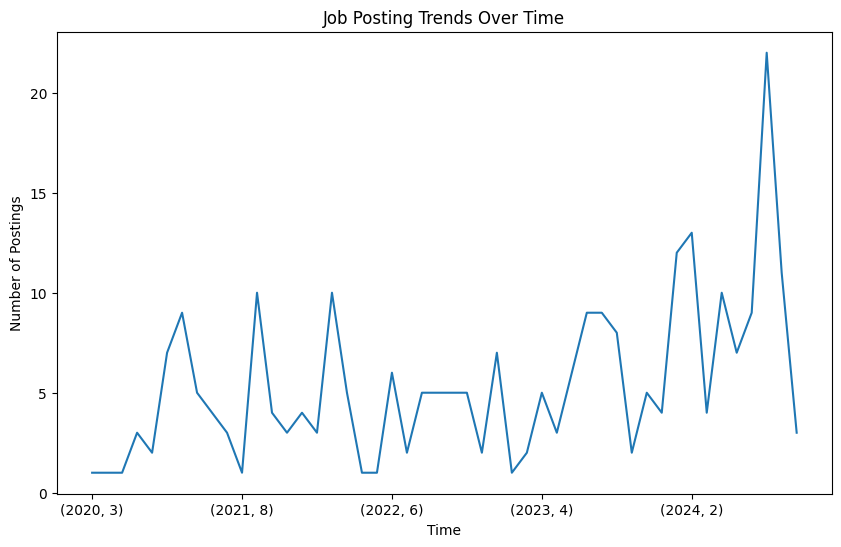

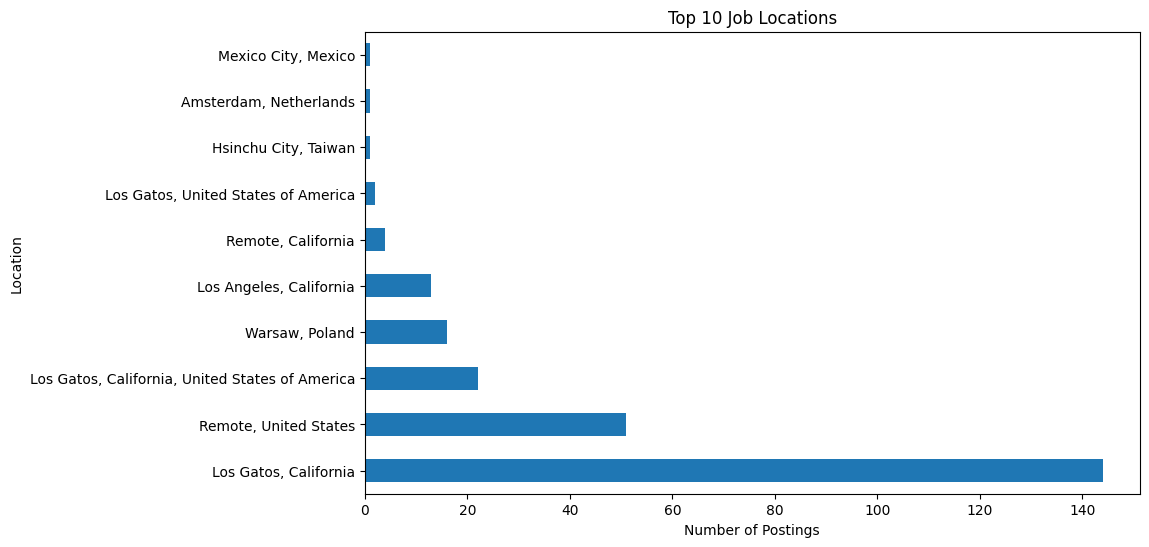

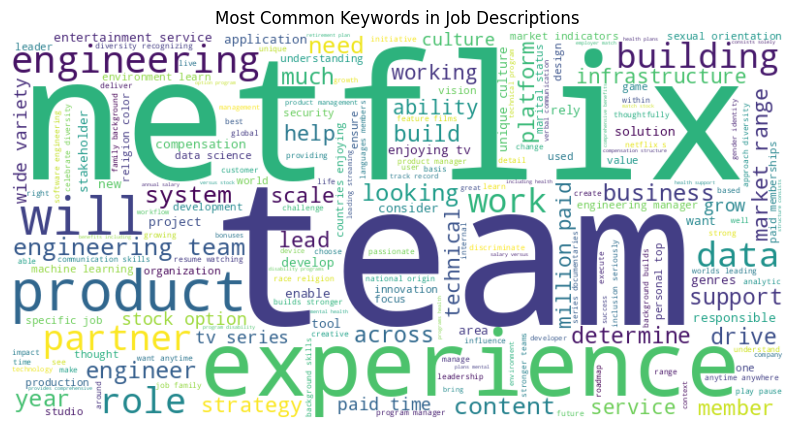

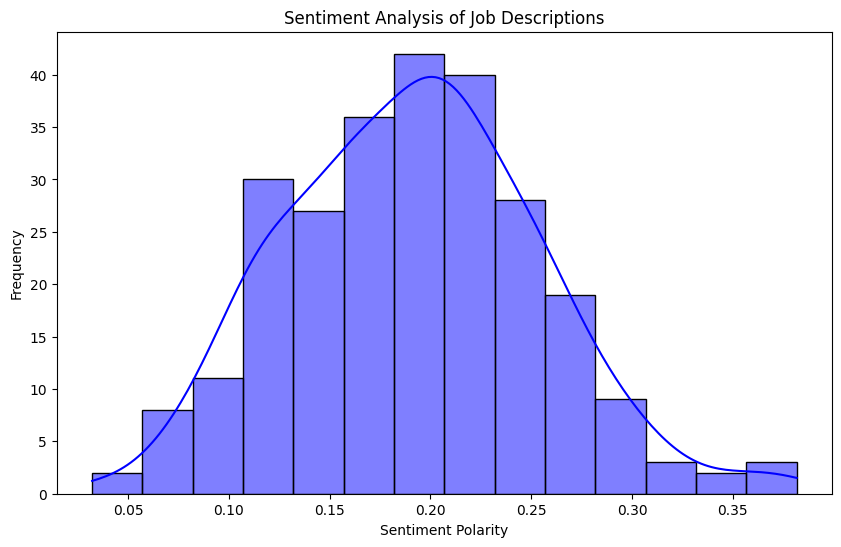

In [141]:
# 1. Job Posting Trends Over Time


# Plot the number of postings per year
plt.figure(figsize=(10, 6))
df.groupby(['year', 'month']).size().plot()
plt.title('Job Posting Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Postings')
plt.show()

# 2. Top Job Locations
plt.figure(figsize=(10, 6))
df['location'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.show()



df['clean_description'] = df['description'].apply(lambda x: clean_text(x))

# Generate word cloud
text = ' '.join(df['cleaned_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords in Job Descriptions')
plt.show()

# 4. Sentiment Analysis
from textblob import TextBlob

df['sentiment'] = df['clean_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='blue')
plt.title('Sentiment Analysis of Job Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


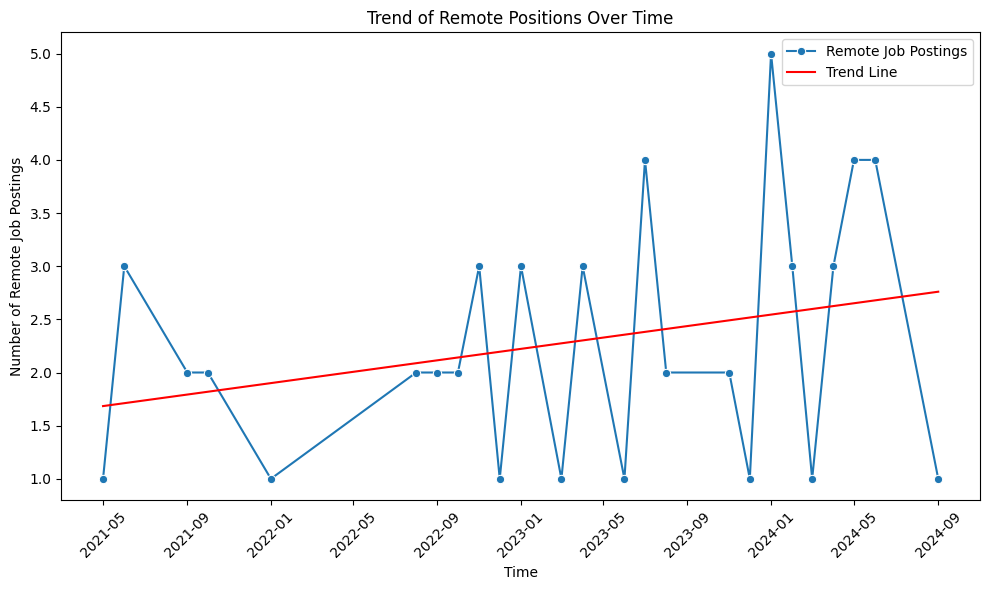

In [111]:


# 1. Filter for Remote Positions (assuming 'Remote' appears in the 'location' column)
remote_jobs = df[df['cleaned_location'].str.contains("Remote", case=False, na=False)]

# Group by 'year_month' and count the number of remote positions
remote_trend = remote_jobs.groupby('year_month').size().reset_index(name='counts')

# Convert 'year_month' to datetime for plotting
remote_trend['year_month'] = remote_trend['year_month'].dt.to_timestamp()

# Manually fit a linear regression model for the trendline
X = np.array(remote_trend['year_month'].map(pd.Timestamp.toordinal)).reshape(-1, 1)  # Use date ordinals as X
y = remote_trend['counts']  # Counts as y

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate the predicted y values (trendline)
remote_trend['trendline'] = model.predict(X)

# Plot the remote positions trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=remote_trend['year_month'], y=remote_trend['counts'], marker='o', label="Remote Job Postings")
plt.plot(remote_trend['year_month'], remote_trend['trendline'], color='red', label='Trend Line')

# Title and labels
plt.title('Trend of Remote Positions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Remote Job Postings')

# Format the x-axis with proper date labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()
df.head().to_clipboard()

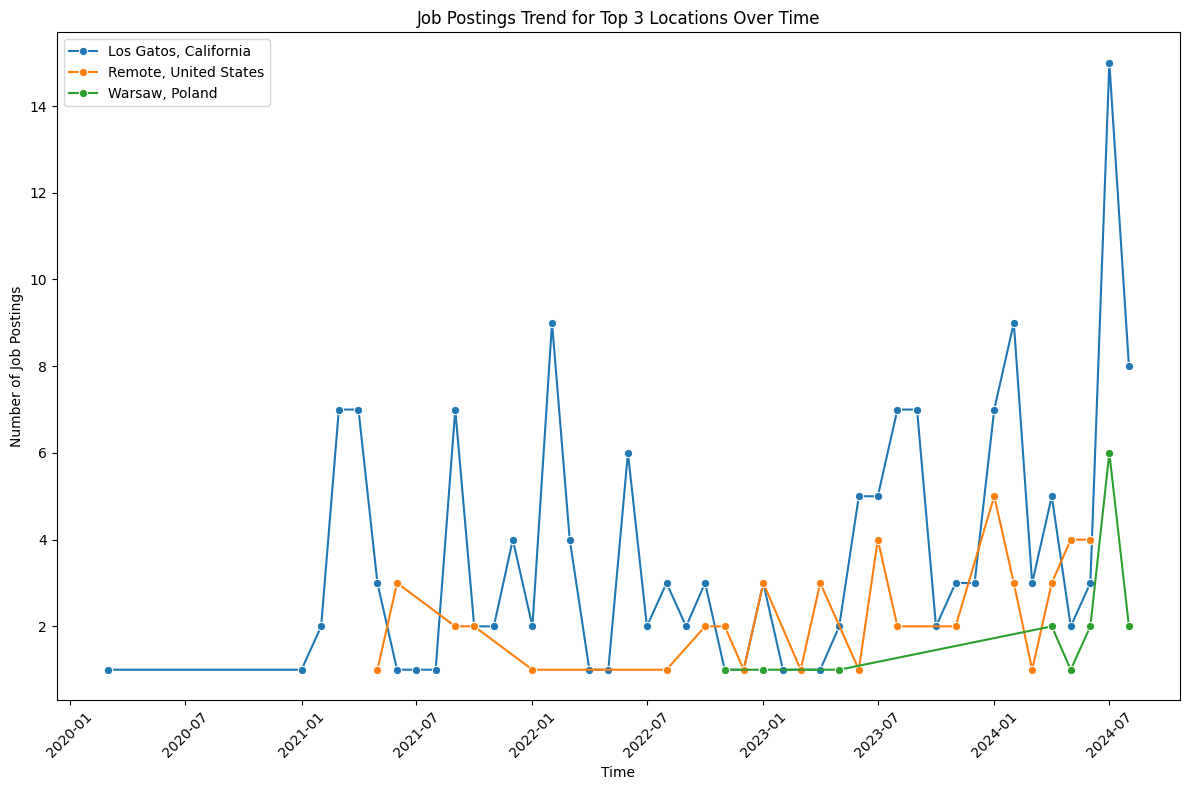

In [112]:
# 2. Find Top 3 Locations
top_locations = df['cleaned_location'].value_counts().nlargest(3).index
top_location_jobs = df[df['cleaned_location'].isin(top_locations)]

# Group by location and time (year_month) and count the number of postings
location_trends = top_location_jobs.groupby(['cleaned_location', 'year_month']).size().reset_index(name='counts')

# Convert 'year_month' to datetime for plotting
location_trends['year_month'] = location_trends['year_month'].dt.to_timestamp()

# Plot the trend for the top 3 locations
plt.figure(figsize=(12, 8))
sns.lineplot(data=location_trends, x='year_month', y='counts', hue='cleaned_location', marker='o')

# Add trend lines for each location
'''
for location in top_locations:
    loc_trend = location_trends[location_trends['cleaned_location'] == location]
    
    # Fit linear regression for each location
    X_loc = np.array(loc_trend['year_month'].map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y_loc = loc_trend['counts']
    model_loc = LinearRegression()
    model_loc.fit(X_loc, y_loc)
    
    # Generate trendline predictions
    loc_trend['trendline'] = model_loc.predict(X_loc)
    
    # Plot the trendline
    plt.plot(loc_trend['year_month'], loc_trend['trendline'], label=f"{location} Trend Line")
'''

# Title and labels
plt.title('Job Postings Trend for Top 3 Locations Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Job Postings')

# Format the x-axis with proper date labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [118]:
top_locations = location_trends.groupby('cleaned_location')['counts'].sum().reset_index()
top_locations = top_locations.sort_values(by='counts', ascending=False)
top_locations.head(3)

,cleaned_location,counts
0,"Los Gatos, California",166
1,"Remote, United States",51
2,"Warsaw, Poland",16


        cleaned_organization year_month  counts
0        Client Applications    2021-09       1
1  Client and UI Engineering    2021-03       1
2  Client and UI Engineering    2021-04       1
3  Client and UI Engineering    2021-06       1
4  Client and UI Engineering    2021-08       1


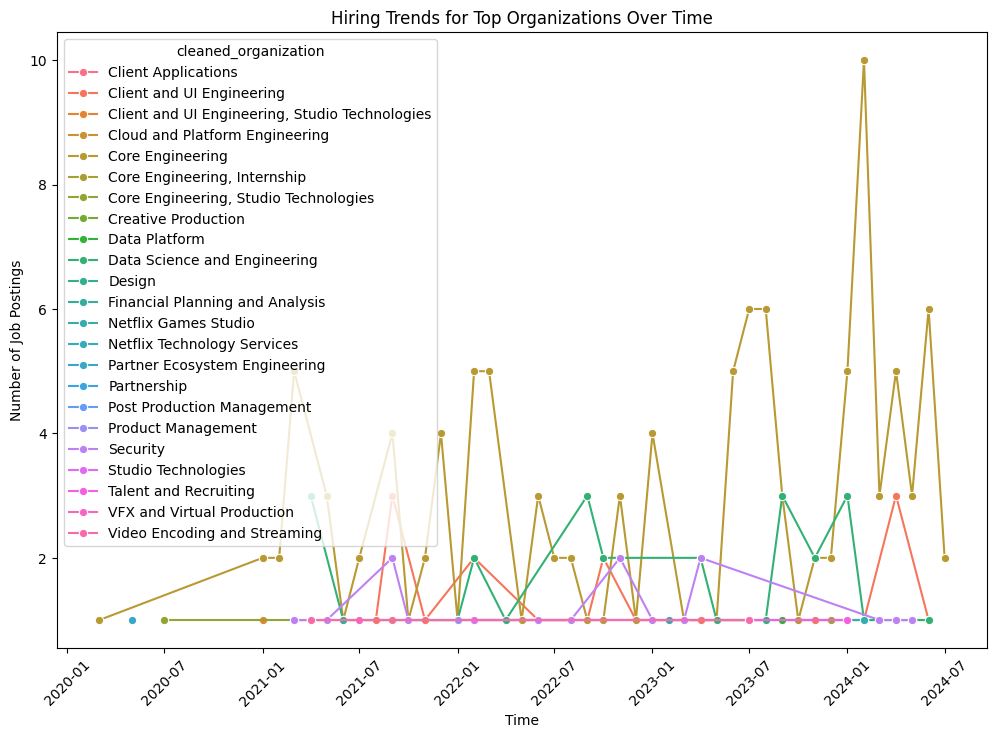

In [114]:
# Function to clean organization data

hiring_trends = df.groupby(['cleaned_organization', 'year_month']).size().reset_index(name='counts')

hiring_trends = hiring_trends[hiring_trends['cleaned_organization'] != "Unknown"]

print(hiring_trends.head())
hiring_trends.

# Convert 'year_month' to datetime for plotting
hiring_trends['year_month'] = hiring_trends['year_month'].astype(str)
hiring_trends['year_month'] = pd.to_datetime(hiring_trends['year_month'])

# Plot the hiring trends for the organizations
plt.figure(figsize=(12, 8))
# sns.lineplot(x=hiring_trends['year_month'], y=hiring_trends['counts'], hue='cleaned_organization', marker='o', label="Job Postings by Org")

sns.lineplot(data=hiring_trends, x='year_month', y='counts', hue='cleaned_organization', marker='o')
plt.title('Hiring Trends for Organizations Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

In [117]:
top_organizations = hiring_trends.groupby('cleaned_organization')['counts'].sum().reset_index()
top_organizations = top_organizations.sort_values(by='counts', ascending=False)

top_organizations.head(5)

,cleaned_organization,counts
4,Core Engineering,117
9,Data Science and Engineering,29
1,Client and UI Engineering,24
18,Security,17
8,Data Platform,5


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer (with stop words)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit the number of features to 1000

# Fit and transform the clean job descriptions
tfidf_matrix = tfidf.fit_transform(df['cleaned_description'])

# View the shape of the resulting TF-IDF matrix
print(tfidf_matrix.shape)

from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 5  # You can experiment with this number

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the job titles and their corresponding clusters
print(df[['text', 'cluster']].head(10))

(260, 1000)
                                                                       text  \
604847d5b5811b50a0e91968                     Engineering Manager, Notebooks   
609d4d14b5811b9f2707b11b                     Engineering Manager, Rendering   
6089bff2aabfb4dc476ba762          Engineering Manager - Partner Engineering   
60878fd1b5811bb54a7dcef1               Site Reliability Engineering Manager   
60772ed4b5811b0d637ddb8c            Engineering Manager, Security Protocols   
607db84ab5811bd7417dd49e                Engineering Manager - Auth Services   
609408127a9df82d95fe48d8        Engineering Manager, Application Networking   
606f38feb5811b7d92a1f1d9                Engineering Manager - JVM Ecosystem   
60805694b5811b69627dd116  Engineering Manager, Promotional Media Enginee...   
604ee785aabfb451ecf82656         Engineering Manager, Data Platform Storage   

                          cluster  
604847d5b5811b50a0e91968        2  
609d4d14b5811b9f2707b11b        4  
6089bff2aa

# 

In [134]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(tfidf_matrix)

# Get the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([tfidf_feature_names[i] for i in topic.argsort()[-10:]])

Topic 0:
['data', 'teams', 'product', 'technical', 'experience', 'engineering', 'team', 'market', 'netflix', 'compensation']
Topic 1:
['content', 'leading', 'technical', 'platform', 'members', 'strong', 'business', 'work', 'culture', 'data']
Topic 2:
['engineers', 'building', 'technical', 'experience', 'platform', 'teams', 'product', 'netflix', 'engineering', 'team']
Topic 3:
['technical', 'building', 'product', 'platform', 'teams', 'engineering', 'business', 'netflix', 'team', 'data']
Topic 4:
['work', 'product', 'experience', 'team', 'technical', 'teams', 'engineering', 'netflix', 'business', 'content']


In [147]:
from collections import Counter

# Tokenize the culture document into words
culture_words = cleaned_culture_doc.split()

# Count word frequencies in the culture document (optional to check)
culture_word_freq = Counter(culture_words)
print(culture_word_freq.most_common(10))  # Top words in culture doc

[('—', 34), ('people', 22), ('netflix', 12), ('work', 12), ('it’s', 12), ('make', 10), ('best', 9), ('every', 9), ('better', 8), ('decisions', 8)]


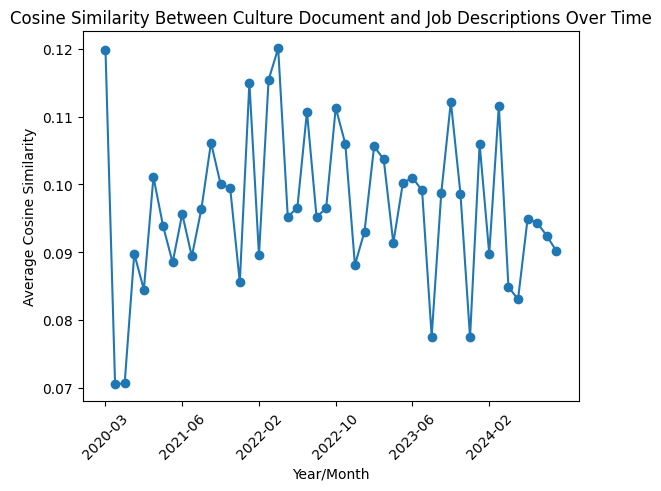

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on both the culture document and job descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_culture_doc] + df['cleaned_description'].tolist())


# Calculate the cosine similarity between the culture document and each job description
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])

# Add the cosine similarity score to the DataFrame
df['cosine_similarity'] = cosine_similarities[0]

# Group by year/month to see how the similarity changes over time
similarity_trend = df.groupby('year_month')['cosine_similarity'].mean()
# Convert the PeriodIndex to strings
similarity_trend.index = similarity_trend.index.astype(str)

# Plot the cosine similarity trend over time
plt.plot(similarity_trend.index, similarity_trend.values, marker='o')
plt.title('Cosine Similarity Between Culture Document and Job Descriptions Over Time')
plt.xlabel('Year/Month')
plt.ylabel('Average Cosine Similarity')
plt.xticks(similarity_trend.index[::8], rotation=45)
plt.show()

In [167]:
def contains_culture_link(description):
    if "jobs.netflix.com/culture" in description:
        return True
    return False

df['includes_culture_link'] = df['description'].apply(contains_culture_link)

# Sum will work here because True is treated as 1 and False as 0 in boolean columns
culture_link_count = df['includes_culture_link'].sum()
print(f"Number of job descriptions with culture link: {culture_link_count}")

missing_links = df[df['includes_culture_link'] == False]
missing_links.head(5)


Number of job descriptions with culture link: 189


,text,lever_id,team,slug,external_id,description,search_text,state,updated_at,created_at,...,department,apply_url,cleaned_location,cleaned_organization,cleaned_description,year_month,year,month,cosine_similarity,includes_culture_link
604847d5b5811b50a0e91968,"Engineering Manager, Notebooks",2398a8f9-ea0b-47db-bd70-80fffb0823bc,[Core Engineering],engineering-manager-notebooks,65824437,<div>Netflix is the world's leading internet T...,"Los Gatos, California \r\n Product \r\n Core E...",Public,2021-05-27T15:35:44+00:00,2021-03-10 04:11:52+00:00,...,NaN,NaN,"Los Gatos, California",Core Engineering,netflix is the worlds leading internet tv netw...,2021-03,2021,3,0.097504,False
60878fd1b5811bb54a7dcef1,Site Reliability Engineering Manager,06d455c3-c67a-48c8-b4b8-bbe77f8e4c34,[Video Encoding and Streaming],sre-manager,76427311,"<div><span style=""font-size: 11pt"">SRE Manager...","Los Gatos, California \r\n Product \r\n Video ...",Public,2021-05-27T15:35:30+00:00,2021-04-19 08:00:00+00:00,...,NaN,NaN,"Los Gatos, California",Video Encoding and Streaming,sre manager committed to leading our cdn relia...,2021-04,2021,4,0.041087,False
607db84ab5811bd7417dd49e,Engineering Manager - Auth Services,6715b5be-2e9e-40c4-8fc7-8591cabdd280,[Security],engineering-manager-auth-services,67568048,<div>Netflix is the world's leading streaming ...,"Los Gatos, California \r\n Product \r\n Securi...",Public,2021-05-27T15:35:37+00:00,2021-03-17 01:34:11+00:00,...,NaN,NaN,"Los Gatos, California",Security,netflix is the worlds leading streaming entert...,2021-03,2021,3,0.076672,False
60805694b5811b69627dd116,"Engineering Manager, Promotional Media Enginee...",b32eb523-5acc-4bc9-8a2d-7a28f0296eb7,"[Core Engineering, Studio Technologies]",engineering-manager-promotional-media-engineering,77066679,<div>Netflix is reinventing how the world watc...,"Los Angeles, California \r\n Product \r\n Core...",Public,2021-05-27T15:35:34+00:00,2021-04-21 16:44:46+00:00,...,NaN,NaN,"Los Angeles, California","Core Engineering, Studio Technologies",netflix is reinventing how the world watches t...,2021-04,2021,4,0.084083,False
604b09477a9df8979a474c9c,"Engineering Manager, Data Platform Edge API In...",68de9c58-05d0-440f-8fce-ed609adaf7e5,[Core Engineering],engineering-manager-data-platform-edge-api-inf...,66347300,"<div><span style=""font-size: 14px"">Netflix is ...","Los Gatos, California \r\n Product \r\n Core E...",Public,2021-05-27T15:35:47+00:00,2021-03-12 06:18:55+00:00,...,NaN,NaN,"Los Gatos, California",Core Engineering,netflix is the worlds leading internet tv netw...,2021-03,2021,3,0.088004,False


In [ ]:
# 

            total_jobs  jobs_with_culture_link  percentage_with_culture_link
year_month                                                                  
2020-03              1                       1                    100.000000
2020-05              1                       0                      0.000000
2020-07              1                       0                      0.000000
2021-01              3                       1                     33.333333
2021-02              2                       2                    100.000000


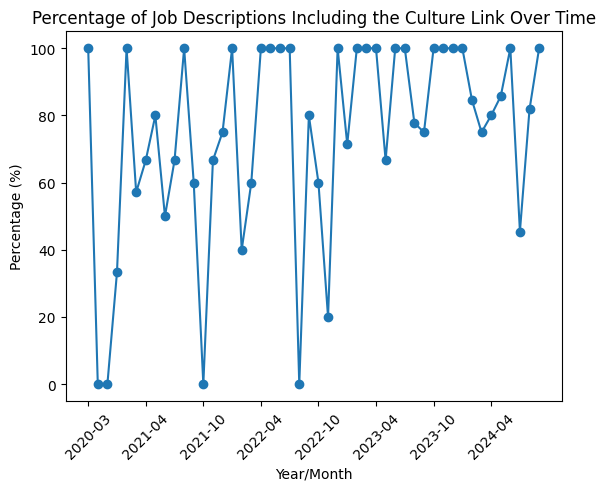

In [164]:
# Group by year/month and calculate total job descriptions and those including the culture link
grouped = df.groupby('year_month').agg(
    total_jobs=('cleaned_description', 'size'),  # Total number of jobs
    jobs_with_culture_link=('includes_culture_link', 'sum')  # Number of jobs with culture link
)

# Calculate the percentage of job descriptions with the culture link
grouped['percentage_with_culture_link'] = (grouped['jobs_with_culture_link'] / grouped['total_jobs']) * 100

print(grouped[['total_jobs', 'jobs_with_culture_link', 'percentage_with_culture_link']].head())

# Plot the trend over time
# Convert the PeriodIndex to strings - why do i always have to do this?
grouped.index = grouped.index.astype(str)

plt.plot(grouped.index, grouped['percentage_with_culture_link'], marker='o')
plt.title('Percentage of Job Descriptions Including the Culture Link Over Time')
plt.xlabel('Year/Month')
plt.ylabel('Percentage (%)')
plt.xticks(grouped.index[::6], rotation=45)
plt.show()